In [ ]:
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
import librosa.display
import soundfile as sf

audio_data = 'MileEnd-HydePark-NoStops.wav'

In [ ]:
x, sr = librosa.load(audio_data, sr=22050)
print(type(x), type(sr))#<class 'numpy.ndarray'> <class 'int'>
print(x.shape, sr)#(94316,) 22050

<class 'numpy.ndarray'> <class 'int'>
(55080989,) 22050


array([-3.2092430e-05, -4.7081898e-04, -1.0782459e-03, ...,
        5.0188246e-05,  2.5954381e-05,  0.0000000e+00], dtype=float32)

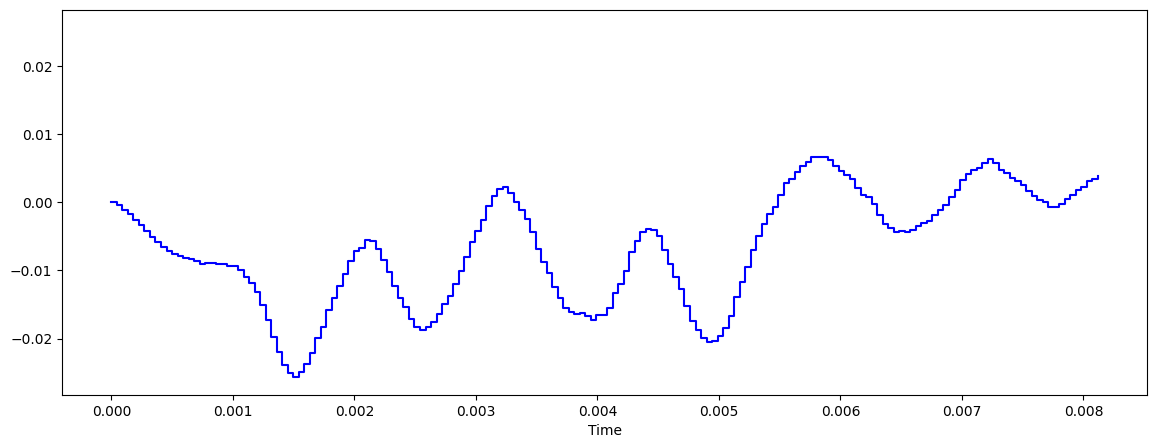

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x[n0:n1], sr=sr, color="blue")

# librosa.display.waveshow(stereo[0, :div], sr=sr, ax=axs[2, 0], color="blue")

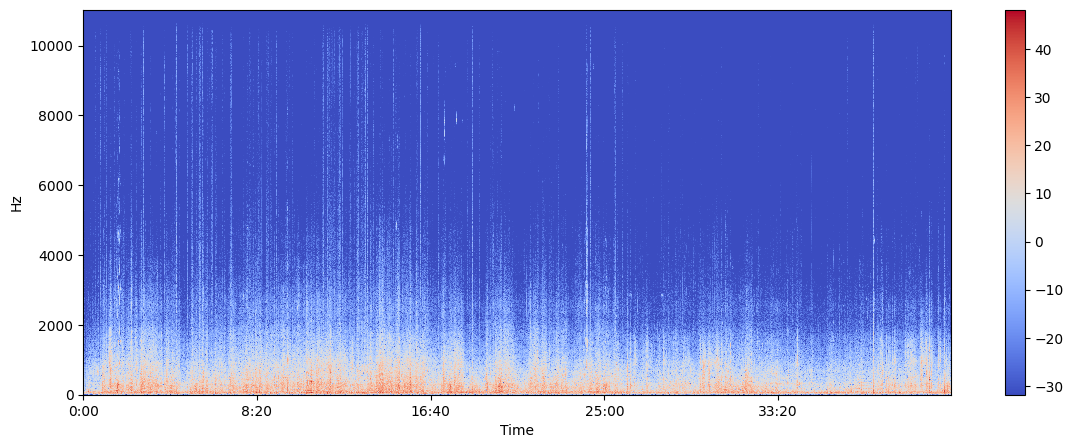

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [ ]:
# sr = 22050 # sample rate
# T = 5.0    # seconds
# t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
# x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
# #Playing the audio
# ipd.Audio(x, rate=sr) # load a NumPy array
# #Saving the audio
# sf.write('tone_no_stops.wav', x, sr)

C:\Python311\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=179
  warnings.warn(


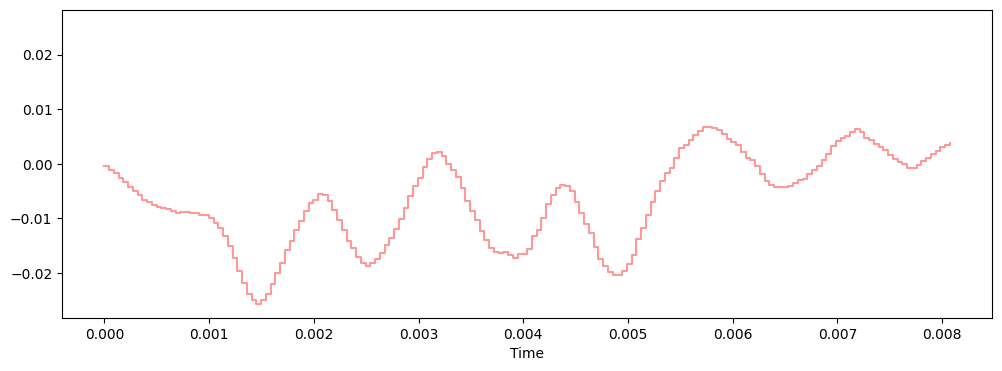

In [ ]:
import sklearn
from sklearn import preprocessing
spectral_centroids = librosa.feature.spectral_centroid(y=x[n0:n1], sr=sr)[0]

# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x[n0:n1], sr=sr, alpha=0.4, color='r')
plt.plot(t, normalize(spectral_centroids), color='b')

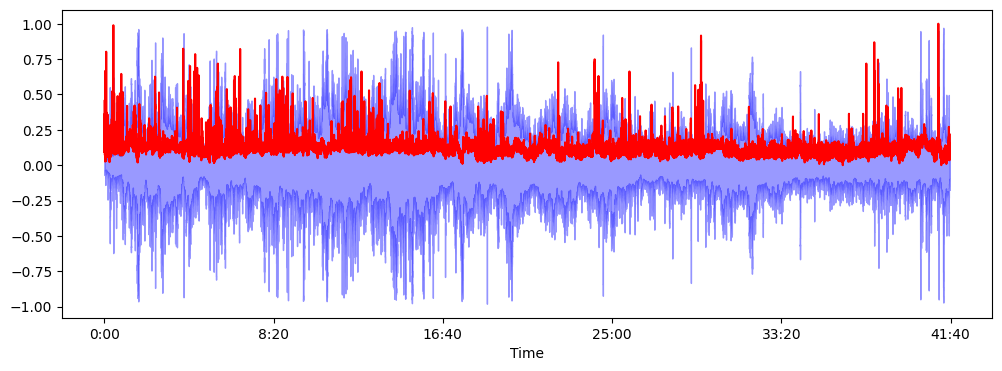

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveshow(x, sr=sr, alpha=0.4, color='b')
plt.plot(t, normalize(spectral_rolloff), color='r')

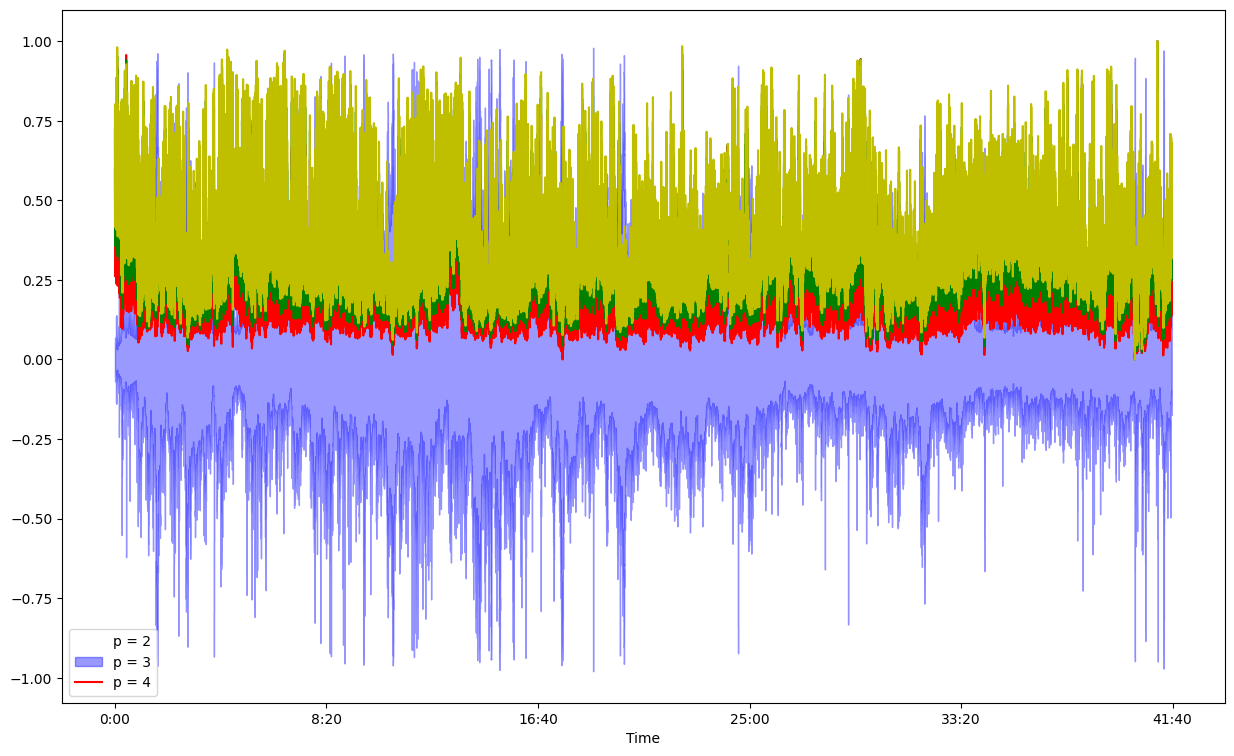

In [ ]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=2)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveshow(x, sr=sr, alpha=0.4, color='b')
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

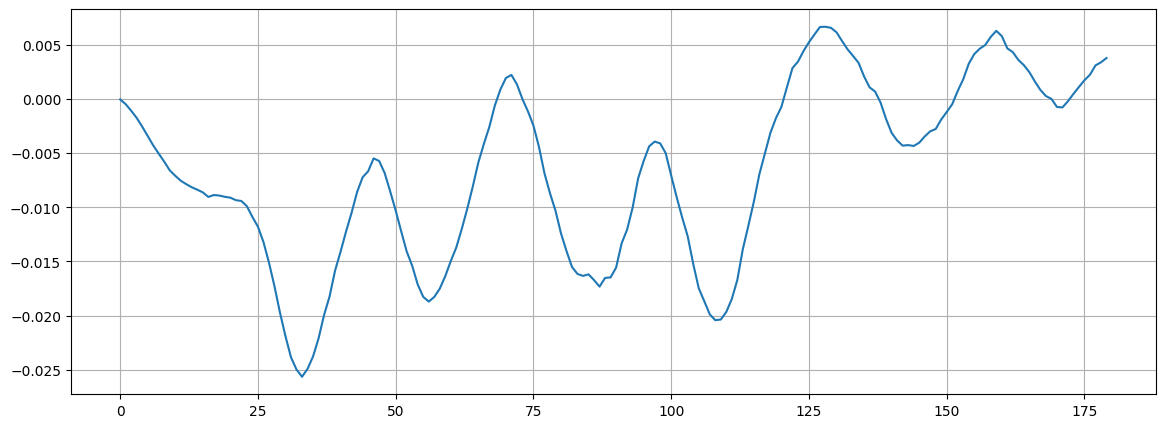

In [ ]:
n0 = 0
n1 = 180
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [ ]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

7


In [ ]:
chromagram = librosa.feature.chroma_stft(y=x[0:400000], sr=sr, hop_length=64)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=128, cmap='coolwarm')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a9ead3db-108d-4aeb-849b-a4d7596e0484' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>